# KNN – K-Nearest Neighbors

In [2]:
import pandas as pd

## Understanding the dataset

In [6]:
df = pd.read_csv('./data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The dataset consists of 7 columns. 

* **species**: penguin species (Chinstrap, Adélie, or Gentoo)
* **culmen_length_mm**: culmen length (mm)
* **culmen_depth_mm**: culmen depth (mm)
* **flipper_length_mm**: flipper length (mm)
* **body_mass_g**: body mass (g)
* **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* **sex**: penguin sex

## Missing values

In [9]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [10]:
df.fillna(df.mean(numeric_only= True), inplace = True)

In [11]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Convert the Categorical variables to numbers

In [13]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df.loc[:, ['island', 'sex']] = oe.fit_transform(df.loc[:, ['island', 'sex']])

In [14]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2.0,39.10000,18.70000,181.000000,3750.000000,1.0
1,Adelie,2.0,39.50000,17.40000,186.000000,3800.000000,0.0
2,Adelie,2.0,40.30000,18.00000,195.000000,3250.000000,0.0
3,Adelie,2.0,43.92193,17.15117,200.915205,4201.754386,1.0
4,Adelie,2.0,36.70000,19.30000,193.000000,3450.000000,0.0


## scaling the data

save the target

In [16]:
y = df.species

scale the data with `StandardScaler`

In [17]:
X_columns = ['island', 'culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g', 'sex' ]

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = scaler.fit_transform(df.loc[:, X_columns])

In [20]:
df

array([[ 1.84407623, -0.88708123,  0.78774251, -1.42248782, -0.56578921,
         0.97700842],
       [ 1.84407623, -0.81349399,  0.12655633, -1.06535169, -0.50316788,
        -1.02353263],
       [ 1.84407623, -0.66631952,  0.43171918, -0.42250666, -1.19200251,
        -1.02353263],
       ...,
       [-0.91402039,  1.1917582 , -0.73807176,  1.50602843,  1.93906399,
         0.97700842],
       [-0.91402039,  0.23512413, -1.19581604,  0.79175618,  1.25022936,
        -1.02353263],
       [-0.91402039,  1.09977416, -0.53462985,  0.8631834 ,  1.50071468,
         0.97700842]])

## Train test split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=36)

##  Classification

In [42]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [43]:
y_pred = model.predict(X_test)

##  Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### accuracy

In [44]:
accuracy_score(y_test, y_pred)

0.9767441860465116

#### confusion metrix

<AxesSubplot:>

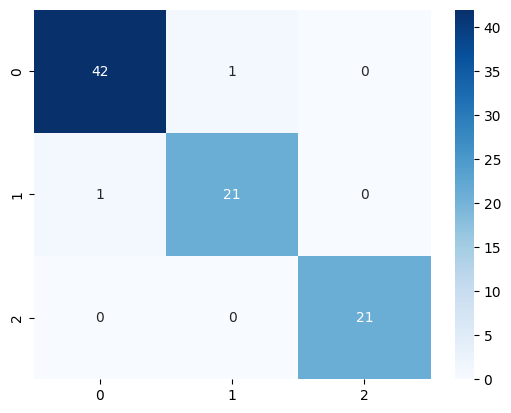

In [48]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')

#### classification report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        43
   Chinstrap       0.95      0.95      0.95        22
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86



We can compute the accuracy of the predictions by simply counting the number of correclty predicted labels

In [61]:
import numpy as np

def accuracy(y_test, y_pred):
    return np.mean(y_test == y_pred)

accuracy(y_test, y_pred)

0.9767441860465116

## cross validation

In [68]:
params = {'n_neighbors': range(1, 15),
        'weights' : ['uniform', 'distance'],
        'metric' : ['minkowski', 'euclidean', 'manhattan']}

In [69]:
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()

gs = GridSearchCV(knn_model, params, cv = 10)

gs_res = gs.fit(df, y)

In [70]:
gs_res.best_score_, gs_res.best_params_

(0.9942016806722689,
 {'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'})